In [77]:
import csv
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from datetime import datetime

csv.register_dialect(
    'myDialect',
    delimiter = ';',
    lineterminator = '\r\n',
    skipinitialspace = False,
    quotechar = '"'
)

def readFile(fileName):
    filecsv=[]
    with open(fileName) as csvfile:
        filereader = csv.reader(csvfile, dialect='myDialect')
        for row in filereader:
            if row[25] != '':
                filecsv.append(row)
            #print(row)
        #filecsv.pop(0)
    return filecsv

def makeDic(file):
    keys = ""
    dFilms = {}
    keys = file[0]
    #print keys
    #keys = keys.split(';')
    file.pop(0)
    for i in range(len(file)):
        values = file[i]
        #values = ''.join(file[i])
        #values = values.split(';')
        #print values[1]
        for a, b in zip(keys, values):
            if '\xc2' in b:
                b = b[:b.rfind('\xc2')]
            if a in dFilms:
                dFilms[a] = dFilms[a] + '", "' + b
            else:                
                dFilms[a] =  b
            #print a + '\t' + b
    #print keys
        #print values
    return dFilms

def makeList(string):
    list = []
    list = ''.join(string)
    #print list
    if('"' in list):
        list = list.replace('"','')
        #print list
    if(',' in list):
        list = list.split(',')
        #print list
    if(';' in list):
        list = list.split(';')
        #print list
    #list = list.replace('"','').split(',')
    return list

file = readFile('movie_metadata.csv')
#print file[0]
#for i in range(len(file)):
#    row = makeList(file[i])
#    #print row
#    listFile.append(row)
#print listFile
#file = listFile
#print file[0]
dic = makeDic(file)
#print dic
#directors = makeList(dic['director_name'])
#print directors
titles = makeList(dic['movie_title']) 
print titles
#actors1 = makeList(dic['actor_1_name'])
#print actors1
ratings = makeList(dic['imdb_score'])
#print score
#movielikes = makeList(dic['movie_facebook_likes'])
#print likes


['Avatar', " Pirates of the Caribbean: At World's End", ' Spectre', ' The Dark Knight Rises', ' Star Wars: Episode VII - The Force Awakens', ' John Carter', ' Spider-Man 3', ' Tangled', ' Avengers: Age of Ultron', ' Harry Potter and the Half-Blood Prince', ' Batman v Superman: Dawn of Justice', ' Superman Returns', ' Quantum of Solace', " Pirates of the Caribbean: Dead Man's Chest", ' The Lone Ranger', ' Man of Steel', ' The Chronicles of Narnia: Prince Caspian', ' The Avengers', ' Pirates of the Caribbean: On Stranger Tides', ' Men in Black 3', ' The Hobbit: The Battle of the Five Armies', ' The Amazing Spider-Man', ' Robin Hood', ' The Hobbit: The Desolation of Smaug', ' The Golden Compass', ' King Kong', ' Titanic', ' Captain America: Civil War', ' Battleship', ' Jurassic World', ' Skyfall', ' Spider-Man 2', ' Iron Man 3', ' Alice in Wonderland', ' X-Men: The Last Stand', ' Monsters University', ' Transformers: Revenge of the Fallen', ' Transformers: Age of Extinction', ' Oz the Gre

In [95]:
#?getTitleDir
#!dir

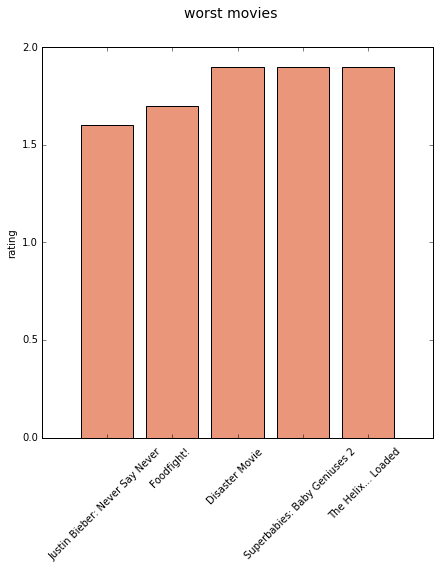

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

title = 11
imdbscore = 25
movielikes = 27
titles = ['']

x_axis = [i+1 for i in range(5)]
y_axis = []
sortedfile = sorted(file, key=lambda file: file[imdbscore])
worstmovies = []

for i in range(5):
    worstmovies.append(sortedfile[i])

#sortedfile = sorted(worstmovies, key=lambda worstmovies: worstmovies[movielikes])
    
for i in range(5):
    try:
        var1 = worstmovies[i][imdbscore]
        titles.append(worstmovies[i][title].decode("utf8"))
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('worst movies', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('rating')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')
ax.set_xticklabels((titles), rotation=45)
plt.show()

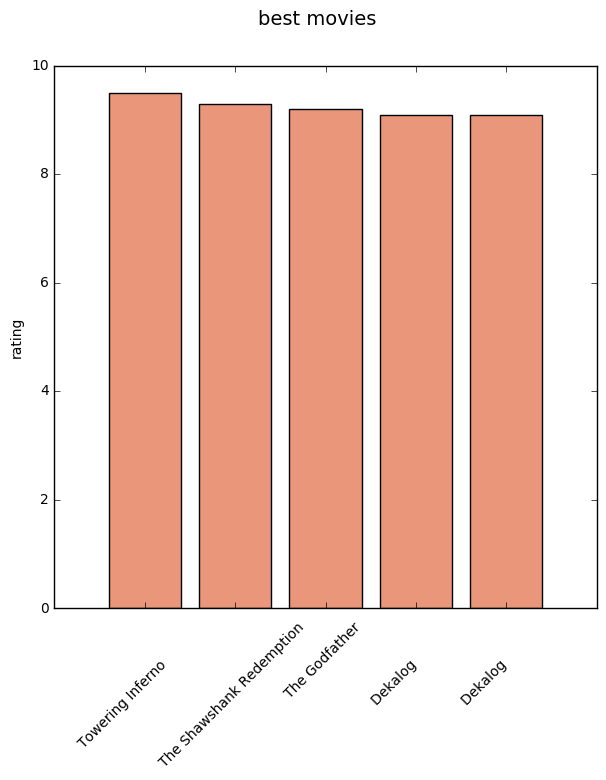

In [97]:
x_axis = [i+1 for i in range(5)]
y_axis = []
sortfile = sorted(file, key=lambda file: file[imdbscore], reverse=True)
bestmovies = []
titles = ['']

for i in range(5):
    if sortedfile[i][imdbscore] != '':
        bestmovies.append(sortfile[i])

#sortedfile = sorted(worstmovies, key=lambda worstmovies: worstmovies[movielikes])
    
for i in range(5):
    try:
        var1 = bestmovies[i][imdbscore]
        titles.append(bestmovies[i][title].decode("utf8"))
        y_axis.append(var1)
    except:
        y_axis.append(0)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('best movies', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('')
ax.set_ylabel('rating')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')
ax.set_xticklabels((titles), rotation=45)
plt.show()